# Error Backpropagation

# 1. 실습용 데이터 생성

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

> ## 1) Input : X (4 * 3)

In [ ]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

> ## 2) Output : y (4 * 1)

In [ ]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)
y
# float 타입

array([[0.],
       [1.],
       [1.],
       [0.]])

> ## 3) W1 (3 * 4)

In [ ]:
np.random.seed(2045)
W1 = np.random.rand(3, 4)
W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

> ## 4) W2 (4 * 1)

In [ ]:
np.random.seed(2046)
W2 = np.random.rand(4)
W2 = W2.reshape(4, 1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

> ## 5) y_hat (4 * 1)

In [ ]:
np.random.seed(2045)
y_hat = np.random.rand(4).reshape(4, 1)
y_hat
# 0, 1, 1, 0에 가까워 져야 한다

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

> ## 6) Layer1 (4 * 4)

In [ ]:
Layer1 = np.ones([4, 4])
Layer1
# float 타입

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

# 2. 함수 정의

> ## 1) sigmoid( )

- Activation Furnction

In [ ]:
def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

> ## 2) d_sigmoid( )

-  sigmoid( ) 미분함수

In [ ]:
def d_sigmoid(x):
  dy = x * (1.0 - x)
  return dy

> ## 3) Loss function

- Mean Squared Error(MSE)

In [ ]:
# def loss_function(y, y_hat):
#   Loss = np.mean((y - y_hat) ** 2)
#   return Loss

- Binary Cross Entropy Error(CEE)





In [ ]:
def loss_function(y, y_hat):
  Loss = -np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
  return Loss
# 위와 본 셀 중 하나만 하면 됨

# 3. 순방향과 역방향 함수 정의

> ## 1) Forward_Propagation

- Layer1 Output
   - Layer1 = sigmoid(np.dot(X, W1)
- y_hat Output
   - y_hat = sigmoid(np.dot(Layer1, W2))

In [ ]:
def forwardProp(X, W1, Layer1, W2, y_hat):
  Layer1 = sigmoid(np.dot(X, W1))  # X, W1을 곱해서 sigmoid 취한 것이 Layer1
  y_hat = sigmoid(np.dot(Layer1, W2))  # 그 다음에 Layer1, W2을 곱해서 sigmoid 취한 것이 y_hat

  return Layer1, y_hat

> ## 2) Backward_Propagation

- d_W2
   - d_W2 = np.dot(np.transpose(Layer1),(-2 * (y - y_hat) * d_sigmoid(y_hat)))
- d_W1
   - d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
   - d_W1 = d_W1 * d_sigmoid(Layer1)
   - d_W1 = np.dot(np.transpose(X), d_W1)

- Gradient Descent
   - W1 = W1 - (0.8 * d_W1)
   - W2 = W2 - (0.8 * d_W2)

In [20]:
def backProp(X, y, y_hat, Layer1, W1, W2):
  d_W2 = np.dot(np.transpose(Layer1),(-2 * (y - y_hat) * d_sigmoid(y_hat))) 
  # transpose(Layer1) : 입력값
  # (y - y_hat) : 오차값
  # d_sigmoid(y_hat) : y_hat에 대한 sigmoid값

  d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
  d_W1 = d_W1 * d_sigmoid(Layer1) # 위식의 누적값이 우변
  d_W1 = np.dot(np.transpose(X), d_W1)  # 위식의 누적값이 우변

  W1 = W1 - (0.8 * d_W1)  # W1에 경사하강 : 원래 W1에서 학습율*델타 W1(위 누적값) 뺀다
  W2 = W2 - (0.8 * d_W2)  

  return y_hat, Layer1, W1, W2

# 4. 오차역전파를 적용한 Gradient Descent

- 학습 과정의 Loss 값 저장 객체

In [21]:
Loss_record = []

> ## 1) Learning with Error Backpropagation

In [22]:
for k in range(0, 1000):
  Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
  y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)

  Loss_record.append(loss_function(y, y_hat))
# forward, backward 왔다갔다 1000번 반복

> ## 2) Parameter Update Check

- W1

In [23]:
W1
# 바꼈다

array([[ 2.084,  4.502,  6.094, -4.226],
       [ 2.375,  4.845, -2.845,  6.44 ],
       [ 1.538, -0.56 ,  0.276,  1.486]])

- W2

In [24]:
W2
# 바꼈다

array([[ 3.653],
       [ 7.209],
       [-7.063],
       [-7.075]])

- y_hat

In [25]:
# y_hat.round()
y_hat
# 0, 1, 1, 0에 매우 가까워졌다, .round()로 확인하면 0, 1, 1, 0으로 출력

array([[0.015],
       [0.958],
       [0.959],
       [0.052]])

> ## 3) Visualization


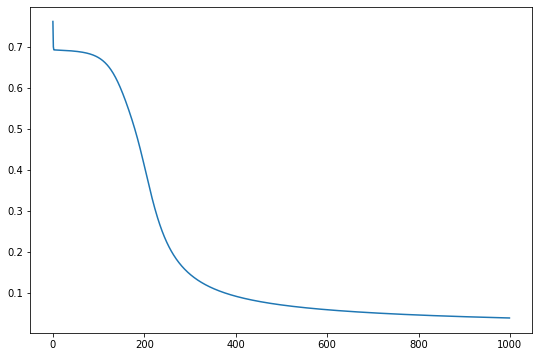

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(Loss_record)
plt.show()

###
#The End
###